# Prediction Module

    The main goal of the prediction module is to use the PropaPhenKG+ and the observations found in the detection module to cluster the observations into similar phenomenon clusters

In [1]:
%load_ext autoreload
%autoreload 2

## Libraries

### Installing

In [2]:
#!pip install pandas
#!pip install tqdm
#!pip install -U scikit-learn
#!pip install matplotlib

### Standard

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import glob

### Custom libraries

## Globals

In [58]:
path_to_kb_gazetteer = "../Detection/data/gazetteers/kbgazetteer.csv"
path_to_netwoork_gazetteer = "../Detection/data/gazetteers/world_gazetteer.csv"
path_to_observationcsv = "../Detection/data/csv/observations_phrase.csv"
path_to_worldkg_nodes = "../Description/data/worldkg_nodes.csv"

## Observation Embedding

    It should get the observations and the PropaPhenKG+ to transform the observations into observation vectors

### Loading Observations

In [59]:
df_observations = pd.read_csv(path_to_observationcsv)

In [60]:
df_observations

,System_Name,n.id,c.name,c.id,intensity
0,"""China""",wkg:424313582,"['Province', 'Province', 'Province']","['C1514578', 'A7659903', 'A7850354']","[1, 1, 1]"
1,"""France""",wkg:1363947712,"['S', 'E', 'S', 'S', 'K', 'K', 'A', 'K', 'E', ...","['A32853699', 'A3122833', 'A20945140', 'A31969...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ..."
2,"""Germany""",wkg:1683325355,"['research', 'activity', 'ulcer Braden scale: ...","['A19722860', 'A18564727', 'C2171311', 'A19723...","[4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 8, 4, 4, 3, 2]"
3,"""India""",wkg:424314145,"['Study', 'Viruses', 'Study', 'Presence of', '...","['A18323259', 'A0132816', 'A16461341', 'A47916...","[2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,"""Kazakhstan""",wkg:424311521,"['PG', 'p', '31', 'G', 'f', 'DN', 'Filed', 'RS...","['A26709416', 'A23010387', 'A20944698', 'A1556...","[4, 4, 8, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 8, ..."
5,"""Netherlands""",wkg:424297217,"['various', 'Medicine', 'various', 'kidney', '...","['C3540765', 'A10759069', 'A22723323', 'A29398...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6,"""Portugal""",wkg:2377028247,"['31', 'RSV', 'Parainfluenza virus 1', 'Parain...","['A34719971', 'A21144343', 'A29378504', 'A3281...","[6, 6, 3, 3, 6, 3, 3, 6, 3, 3, 6, 6, 6, 12, 3,..."
7,"""Russia""",wkg:424314830,"['RS', 'PG', 'URL', 'u', '31', 'DN', 'G', '31'...","['A24583098', 'A32660236', 'C1710546', 'A12814...","[37, 37, 37, 37, 74, 74, 37, 74, 37, 37, 37, 3..."
8,"""United States""",wkg:424317935,"['Researchers', 'European', 'Department', 'D',...","['A26601571', 'A32734221', 'A10825217', 'A1279...","[1, 120, 1, 1, 60, 1, 6, 1, 1, 1, 1, 1, 1, 1, ..."


In [61]:
def obsToList(obs):
    return list([x.replace("'",'') for x in
        map(str.strip, obs.strip('][').replace('"', '').replace('"', "").split(','))])

In [62]:
obs_dict = {}
obs_set = set([])
for index, row in df_observations.iterrows():
    obs_dict[row['n.id']] = obsToList(row['c.id'])
    obs_set = obs_set.union(set(obs_dict[row['n.id']]))
place_set = list(obs_dict.keys())

### Embeddings

In [63]:
class ObservationEmbedding():
    
    def __init__(self, obs_dict):
        self.obs_dict = obs_dict
        
    def binaryDictionaryEmbedding(self, dict_kb,dict_net):
        obs_matrix = np.zeros((len(dict_net),len(dict_kb)))
        for system in self.obs_dict.keys():
            for kb_item in obs_dict[system]:
                obs_matrix[dict_net[system],dict_kb[kb_item]] = 1
        return obs_matrix

In [64]:
dict_kb = dict(zip(list(obs_set),range(len(obs_set))))

In [65]:
dict_net = dict(zip(place_set,range(len(place_set))))

In [66]:
#import sys
#print("The size of the variable is:",sys.getsizeof(obs_matrix), "bytes.")

In [67]:
obsEmbedding = ObservationEmbedding(obs_dict)

In [68]:
embeddingMatrix = obsEmbedding.binaryDictionaryEmbedding(dict_kb,dict_net)

In [69]:
for i in range(embeddingMatrix.shape[0]):
    print(embeddingMatrix[i,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Connection to Neo4j

from neo4j import GraphDatabase
from tqdm import tqdm


class Neo4jWrapper:

    def __init__(self, uri, userName, password):
        self.uri = uri
        self.userName = userName
        self.password = password
        # Connect to the neo4j database server
        self.graphDB_Driver  = GraphDatabase.driver(uri, auth=(userName, password)) 
        
    def sendQuery(self, cql_commands):
        result = []
        done_queries = []
        with self.graphDB_Driver.session() as graphDB_Session:
            for cqlCreate in tqdm(cql_commands):
                try:
                    result += [graphDB_Session.run(cqlCreate).to_df()]
                    done_queries.append(cqlCreate)
                except Exception as e:
                    tqdm.write(str(e))
                    tqdm.write(cqlCreate)
                    result += [str(e)]
        return result
    
    def closeConnection(self):
        self.graphDB_Driver.close()

neowrapper = Neo4jWrapper(uri="bolt://localhost:7687",userName="neo4j",password="test")

## Observation Clustering
    It should get the observation vectors and transform them into Phenomenon Cluster

In [70]:
class ObservationClustering():
    
    def __init__(self, embeddingMatrix=None):
        self.embeddingMatrix = embeddingMatrix
        
    def KMeans(self,nb_clusters,random_state=0,n_init="auto"):
        return KMeans(n_clusters=nb_clusters, random_state=random_state, n_init=n_init).fit(self.embeddingMatrix)
    
    def plot(self, legend_list, labels, apply_pca=True, pca_random_state=1):
        if apply_pca:
            pca = PCA(2, random_state=pca_random_state)
            matrix = pca.fit_transform(self.embeddingMatrix)
        else:
            matrix = self.embeddingMatrix
        u_labels = np.unique(labels)
        for i in u_labels:
            plt.scatter(matrix[labels == i , 0] , matrix[labels == i , 1] , label = i)
        # Label points
        for (i,j, legend) in zip(matrix[:,0], matrix[:,1],legend_list):
            plt.text(i, j, legend)
        plt.legend()
        plt.show()
    
    def smartPrint(self, np_obslist, labels):
        u_labels = np.unique(labels)
        print('Clusters:')
        for i in range(len(u_labels)):
            print("clusters : " + str(u_labels[i]))
            print(np_obslist[labels==u_labels[i]])

In [71]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [72]:
obsClusteringModule = ObservationClustering(embeddingMatrix)

In [73]:
kmeans = obsClusteringModule.KMeans(4,random_state=5)

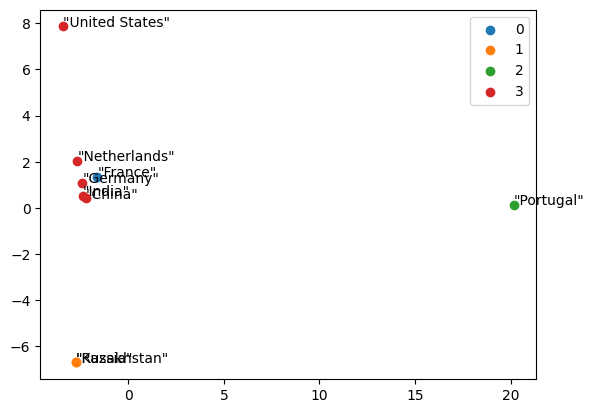

In [74]:
obsClusteringModule.plot(list(df_observations['System_Name']),kmeans.labels_)

In [75]:
obsClusteringModule.smartPrint(df_observations['System_Name'].to_numpy(),kmeans.labels_)

Clusters:
clusters : 0
['"France"']
clusters : 1
['"Kazakhstan"' '"Russia"']
clusters : 2
['"Portugal"']
clusters : 3
['"China"' '"Germany"' '"India"' '"Netherlands"' '"United States"']
